<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Importing Packages

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [3]:
xls = pd.ExcelFile(r'bank_term_deposit_marketing_analysis.xlsx')

In [4]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [6]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
load_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [7]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [9]:
load_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [11]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [10]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [12]:
df = pd.merge(client_info, load_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df = df.drop('ID', axis=1)

In [14]:
df.head(3)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


### Data Prep & Start H2O

In [18]:
import h2o
h2o.init(max_mem_size='8G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from C:\Users\UTKARSH SINGH\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\UTKARS~1\AppData\Local\Temp\tmpoibzgytu
  JVM stdout: C:\Users\UTKARS~1\AppData\Local\Temp\tmpoibzgytu\h2o_UTKARSH_SINGH_started_from_python.out
  JVM stderr: C:\Users\UTKARS~1\AppData\Local\Temp\tmpoibzgytu\h2o_UTKARSH_SINGH_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_UTKARSH_SINGH_w85cbc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [19]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
h2o_df.describe()

Rows:45211
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [21]:
train,test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [22]:
from h2o.automl import H2OAutoML

In [23]:
aml = H2OAutoML(max_runtime_secs=600,
                balance_classes=True,
                stopping_metric='logloss',
                project_name='Final',
                seed=1
               )

%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
17:57:13.77: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 3.83 s
Wall time: 10min 3s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/65
# GBM base models (used / total),11/48
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),4/14
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### AutoML Leaderboard and Ensemble Exploration

In [25]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_4_AutoML_1_20230810_175713,0.937143,0.192776,0.63505,0.173103,0.246635,0.0608287
StackedEnsemble_AllModels_3_AutoML_1_20230810_175713,0.937139,0.19274,0.635385,0.170733,0.246582,0.0608028
StackedEnsemble_AllModels_2_AutoML_1_20230810_175713,0.936466,0.193378,0.633243,0.176487,0.246853,0.0609365
StackedEnsemble_AllModels_1_AutoML_1_20230810_175713,0.935975,0.194385,0.626913,0.171657,0.247554,0.0612829
StackedEnsemble_BestOfFamily_4_AutoML_1_20230810_175713,0.935873,0.194404,0.62607,0.170217,0.247761,0.0613855
StackedEnsemble_BestOfFamily_3_AutoML_1_20230810_175713,0.935777,0.194476,0.625867,0.176946,0.247809,0.0614091
StackedEnsemble_BestOfFamily_2_AutoML_1_20230810_175713,0.935432,0.195132,0.622862,0.180516,0.248124,0.0615656
StackedEnsemble_BestOfFamily_1_AutoML_1_20230810_175713,0.935144,0.196411,0.621488,0.171774,0.248628,0.0618157
GBM_1_AutoML_1_20230810_175713,0.935096,0.204238,0.620737,0.172096,0.254277,0.0646566
GBM_grid_1_AutoML_1_20230810_175713_model_36,0.934812,0.20503,0.620054,0.163768,0.255076,0.0650636


In [26]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\UTKARSH SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [27]:
metalearner.varimp()

[('DRF_1_AutoML_1_20230810_175713',
  0.6050745844841003,
  1.0,
  0.21910767126514724),
 ('GBM_1_AutoML_1_20230810_175713',
  0.425290048122406,
  0.7028721070560541,
  0.15400467057427927),
 ('GBM_5_AutoML_1_20230810_175713',
  0.34258022904396057,
  0.5661785139034585,
  0.12405405570174857),
 ('GBM_grid_1_AutoML_1_20230810_175713_model_2',
  0.27042287588119507,
  0.446924863174948,
  0.09792466600075742),
 ('GBM_grid_1_AutoML_1_20230810_175713_model_19',
  0.2415093183517456,
  0.3991397499494408,
  0.08745458112077514),
 ('GBM_grid_1_AutoML_1_20230810_175713_model_36',
  0.23491980135440826,
  0.38824932889010033,
  0.08506840632336612),
 ('GBM_grid_1_AutoML_1_20230810_175713_model_3',
  0.19006536900997162,
  0.31411891010432286,
  0.06882586289330431),
 ('DeepLearning_1_AutoML_1_20230810_175713',
  0.11283446848392487,
  0.18648026437952267,
  0.0408592564651062),
 ('GBM_grid_1_AutoML_1_20230810_175713_model_1',
  0.0934477224946022,
  0.15444000606020786,
  0.03383899007802737

### Base Learner XGBoost Model Exploration

In [28]:
model = h2o.get_model('DRF_1_AutoML_1_20230810_175713')

In [29]:
model.model_performance(test)

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08174516503628121
RMSE: 0.28591111387331763
LogLoss: 0.2719411738995391
Mean Per-Class Error: 0.1751831678209007
AUC: 0.9285210946360615
AUCPR: 0.5940655379942748
Gini: 0.857042189272123

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0900279612583455
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9207  835    0.0832   (835.0/10042.0)
yes    357   979    0.2672   (357.0/1336.0)
Total  9564  1814   0.1048   (1192.0/11378.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.090028     0.621587  272
max f2                       0.0619716    0.730699  301
max f0point5                 0.129808     0.581633  236
max accuracy                 0.175313     0.903586  199
max precision                0.995352     1         0
max recall                   9.10131e-07  1         399
max specificity              0.995352     1         0
max absolute_mcc             0.0619716    0.577922  301
max min_per_class_accuracy   0.0475091    0.858893  317
max mean_per_class_accuracy  0.0281337    0.865654  341
max tns                      0.995352     10042     0
max fns                      0.995352     1334      0
max fps                      9.10131e-07  10042     399
max tps                      9.10131e-07  1336      399
max tnr                      0.995352     1         0
max fnr                      0.995352     0.998503  0
max fpr                      9.10131e-07  1         399
max tpr                      9.10131e-07  1         399

Gains/Lift Table: Avg response rate: 11.74 %, avg score:  4.69 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100193                   0.506097           6.64882    6.64882            0.780702         0.630158     0.780702                    0.630158            0.0666168       0.0666168                  564.882   564.882            0.0641272
2        0.0200387                   0.409146           5.75235    6.20059            0.675439         0.455843     0.72807                     0.543               0.0576347       0.124251                   475.235   520.059            0.118077
3        0.030058                    0.343757           5.37882    5.92666            0.631579         0.375        0.695906                    0.487               0.0538922       0.178144                   437.882   492.666            0.167787
4        0.0400773                   0.297494           5.75235    5.88309            0.675439         0.320812     0.690789                    0.445453            0.0576347       0.235778                   475.235   488.309            0.221737
5        0.0500088                   0.262177           5.42642    5.79239            0.637168         0.278438     0.680141                    0.412285            0.0538922       0.289671                   442.642   479.239            0.271547
6        0.100018                    0.15865            4.44533    5.11886            0.521968         0.203134     0.601054                    0.307709            0.222305        0.511976                   344.533   411.886            0.466766
7        0.150026                    0.0984478          3.80173    4.67982            0.446397         0.125592     0.549502                    0.247004            0.19012         0.702096                   280.173   367.982            0.

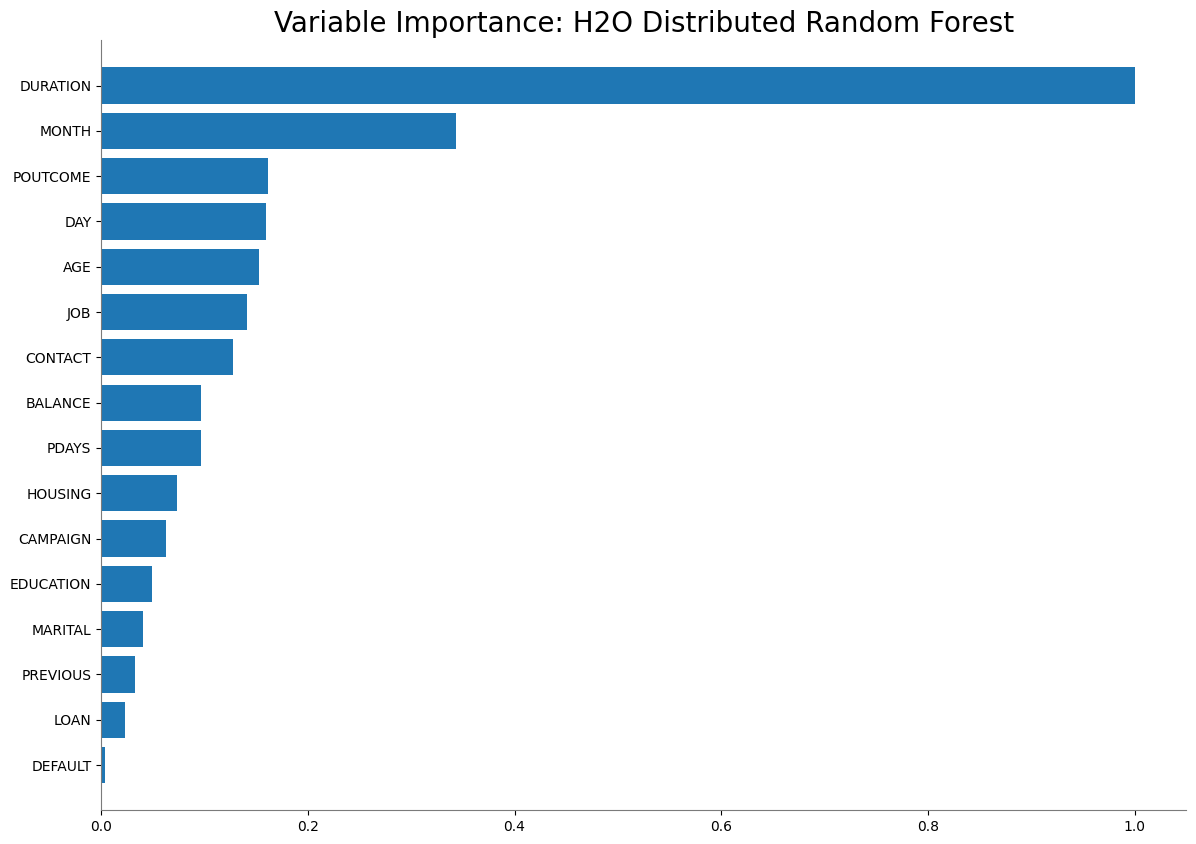

<Figure size 640x480 with 0 Axes>

In [31]:
model.varimp_plot(num_of_features=20)